In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
from cuml.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")


from sklearn import set_config 

set_config(display="diagram")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
#Genetic
df = pd.read_csv("/kaggle/input/benchmarkjagen/Diabetes/Results_Genetic.csv")
df.head(11)
indexs_Genetic = []
# Iterate over the lists in the column
for lst in df['Selected index 100']:    
        numbers = lst.strip('[]').split()
        numbers = [int(num) for num in numbers]
        indexs_Genetic.append(np.array(numbers))
        
#ISCA        
df = pd.read_csv("/kaggle/input/benchmarkjagen/Diabetes/Results_ISCA.csv")
df.head(11)
indexs_ISCA = []
# Iterate over the lists in the column
for lst in df['Selected index 100']:    
        numbers = lst.strip('[]').split()
        numbers = [int(num) for num in numbers]
        indexs_ISCA.append(np.array(numbers))

#ISSA
df = pd.read_csv("/kaggle/input/benchmarkjagen/Diabetes/Results_ISSA.csv")
df.head(11)
indexs_ISSA = []
# Iterate over the lists in the column
for lst in df['Selected index 100']:    
        numbers = lst.strip('[]').split()
        numbers = [int(num) for num in numbers]
        indexs_ISSA.append(np.array(numbers))
        
#JA_GA
df = pd.read_csv("/kaggle/input/benchmarkjagen/Diabetes/Results_JA+GA.csv")
df.head(11)
indexs_JA_GA = []
# Iterate over the lists in the column
for lst in df['Selected index 100']:    
        numbers = lst.strip('[]').split()
        numbers = [int(num) for num in numbers]
        indexs_JA_GA.append(np.array(numbers))

#Jaya
df = pd.read_csv("/kaggle/input/benchmarkjagen/Diabetes/Results_Jaya.csv")
df.head(11)
indexs_Jaya = []
# Iterate over the lists in the column
for lst in df['Selected index 100']:    
        numbers = lst.strip('[]').split()
        numbers = [int(num) for num in numbers]
        indexs_Jaya.append(np.array(numbers))

#MGFPA
df = pd.read_csv("/kaggle/input/benchmarkjagen/Diabetes/Results_MGFPA.csv")
df.head(11)
indexs_MGFPA = []
# Iterate over the lists in the column
for lst in df['Selected index 100']:    
        numbers = lst.strip('[]').split()
        numbers = [int(num) for num in numbers]
        indexs_MGFPA.append(np.array(numbers))

#PSO
df = pd.read_csv("/kaggle/input/benchmarkjagen/Diabetes/Results_PSO.csv")
df.head(11)
indexs_PSO = []
# Iterate over the lists in the column
for lst in df['Selected index 100']:    
        numbers = lst.strip('[]').split()
        numbers = [int(num) for num in numbers]
        indexs_PSO.append(np.array(numbers))

In [3]:
#Original
features_test_Diabetes = np.load('/kaggle/input/benchmarkjagen/Diabetes/xtest.npy')
y_test = np.load("/kaggle/input/benchmarkjagen/Diabetes/ytest.npy")
features_train_Diabetes = np.load('/kaggle/input/benchmarkjagen/Diabetes/xtrain.npy')
y_train = np.load("/kaggle/input/benchmarkjagen/Diabetes/ytrain.npy")
#JA + GA (Jaya + Genetic)
featuresIndex_Diabetes_JA_GA_100iter_run1 = indexs_JA_GA[0]
featuresIndex_Diabetes_JA_GA_100iter_run2 = indexs_JA_GA[1]
featuresIndex_Diabetes_JA_GA_100iter_run3 = indexs_JA_GA[2]
featuresIndex_Diabetes_JA_GA_100iter_run4 = indexs_JA_GA[3]
featuresIndex_Diabetes_JA_GA_100iter_run5 = indexs_JA_GA[4]
featuresIndex_Diabetes_JA_GA_100iter_run6 = indexs_JA_GA[5]
featuresIndex_Diabetes_JA_GA_100iter_run7 = indexs_JA_GA[6]
featuresIndex_Diabetes_JA_GA_100iter_run8 = indexs_JA_GA[7]
featuresIndex_Diabetes_JA_GA_100iter_run9 = indexs_JA_GA[8]
featuresIndex_Diabetes_JA_GA_100iter_run10 = indexs_JA_GA[9]

featuresIndex_Diabetes_JA_GA_380iter_run1 = indexs_JA_GA[0]
featuresIndex_Diabetes_JA_GA_380iter_run2 = indexs_JA_GA[1]
featuresIndex_Diabetes_JA_GA_380iter_run3 = indexs_JA_GA[2]
featuresIndex_Diabetes_JA_GA_380iter_run4 = indexs_JA_GA[3]
featuresIndex_Diabetes_JA_GA_380iter_run5 = indexs_JA_GA[4]
featuresIndex_Diabetes_JA_GA_380iter_run6 = indexs_JA_GA[5]
featuresIndex_Diabetes_JA_GA_380iter_run7 = indexs_JA_GA[6]
featuresIndex_Diabetes_JA_GA_380iter_run8 = indexs_JA_GA[7]
featuresIndex_Diabetes_JA_GA_380iter_run9 = indexs_JA_GA[8]
featuresIndex_Diabetes_JA_GA_380iter_run10 = indexs_JA_GA[9]

#ISSA
featuresIndex_Diabetes_ISSA_100iter_run1 = indexs_ISSA[0]
featuresIndex_Diabetes_ISSA_100iter_run2 = indexs_ISSA[1]
featuresIndex_Diabetes_ISSA_100iter_run3 = indexs_ISSA[2]
featuresIndex_Diabetes_ISSA_100iter_run4 = indexs_ISSA[3]
featuresIndex_Diabetes_ISSA_100iter_run5 = indexs_ISSA[4]
featuresIndex_Diabetes_ISSA_100iter_run6 = indexs_ISSA[5]
featuresIndex_Diabetes_ISSA_100iter_run7 = indexs_ISSA[6]
featuresIndex_Diabetes_ISSA_100iter_run8 = indexs_ISSA[7]
featuresIndex_Diabetes_ISSA_100iter_run9 = indexs_ISSA[8]
featuresIndex_Diabetes_ISSA_100iter_run10 = indexs_ISSA[9]

featuresIndex_Diabetes_ISSA_380iter_run1 = indexs_ISSA[0]
featuresIndex_Diabetes_ISSA_380iter_run2 = indexs_ISSA[1]
featuresIndex_Diabetes_ISSA_380iter_run3 = indexs_ISSA[2]
featuresIndex_Diabetes_ISSA_380iter_run4 = indexs_ISSA[3]
featuresIndex_Diabetes_ISSA_380iter_run5 = indexs_ISSA[4]
featuresIndex_Diabetes_ISSA_380iter_run6 = indexs_ISSA[5]
featuresIndex_Diabetes_ISSA_380iter_run7 = indexs_ISSA[6]
featuresIndex_Diabetes_ISSA_380iter_run8 = indexs_ISSA[7]
featuresIndex_Diabetes_ISSA_380iter_run9 = indexs_ISSA[8]
featuresIndex_Diabetes_ISSA_380iter_run10 = indexs_ISSA[9]

#Jaya
featuresIndex_Diabetes_Jaya_100iter_run1 = indexs_Jaya[0]
featuresIndex_Diabetes_Jaya_100iter_run2 = indexs_Jaya[1]
featuresIndex_Diabetes_Jaya_100iter_run3 = indexs_Jaya[2]
featuresIndex_Diabetes_Jaya_100iter_run4 = indexs_Jaya[3]
featuresIndex_Diabetes_Jaya_100iter_run5 = indexs_Jaya[4]
featuresIndex_Diabetes_Jaya_100iter_run6 = indexs_Jaya[5]
featuresIndex_Diabetes_Jaya_100iter_run7 = indexs_Jaya[6]
featuresIndex_Diabetes_Jaya_100iter_run8 = indexs_Jaya[7]
featuresIndex_Diabetes_Jaya_100iter_run9 = indexs_Jaya[8]
featuresIndex_Diabetes_Jaya_100iter_run10 = indexs_Jaya[9]

featuresIndex_Diabetes_Jaya_380iter_run1 = indexs_Jaya[0]
featuresIndex_Diabetes_Jaya_380iter_run2 = indexs_Jaya[1]
featuresIndex_Diabetes_Jaya_380iter_run3 = indexs_Jaya[2]
featuresIndex_Diabetes_Jaya_380iter_run4 = indexs_Jaya[3]
featuresIndex_Diabetes_Jaya_380iter_run5 = indexs_Jaya[4]
featuresIndex_Diabetes_Jaya_380iter_run6 = indexs_Jaya[5]
featuresIndex_Diabetes_Jaya_380iter_run7 = indexs_Jaya[6]
featuresIndex_Diabetes_Jaya_380iter_run8 = indexs_Jaya[7]
featuresIndex_Diabetes_Jaya_380iter_run9 = indexs_Jaya[8]
featuresIndex_Diabetes_Jaya_380iter_run10 = indexs_Jaya[9]

#PSO
featuresIndex_Diabetes_PSO_100iter_run1 = indexs_PSO[0]
featuresIndex_Diabetes_PSO_100iter_run2 = indexs_PSO[1]
featuresIndex_Diabetes_PSO_100iter_run3 = indexs_PSO[2]
featuresIndex_Diabetes_PSO_100iter_run4 = indexs_PSO[3]
featuresIndex_Diabetes_PSO_100iter_run5 = indexs_PSO[4]
featuresIndex_Diabetes_PSO_100iter_run6 = indexs_PSO[5]
featuresIndex_Diabetes_PSO_100iter_run7 = indexs_PSO[6]
featuresIndex_Diabetes_PSO_100iter_run8 = indexs_PSO[7]
featuresIndex_Diabetes_PSO_100iter_run9 = indexs_PSO[8]
featuresIndex_Diabetes_PSO_100iter_run10 = indexs_PSO[9]

featuresIndex_Diabetes_PSO_380iter_run1 = indexs_PSO[0]
featuresIndex_Diabetes_PSO_380iter_run2 = indexs_PSO[1]
featuresIndex_Diabetes_PSO_380iter_run3 = indexs_PSO[2]
featuresIndex_Diabetes_PSO_380iter_run4 = indexs_PSO[3]
featuresIndex_Diabetes_PSO_380iter_run5 = indexs_PSO[4]
featuresIndex_Diabetes_PSO_380iter_run6 = indexs_PSO[5]
featuresIndex_Diabetes_PSO_380iter_run7 = indexs_PSO[6]
featuresIndex_Diabetes_PSO_380iter_run8 = indexs_PSO[7]
featuresIndex_Diabetes_PSO_380iter_run9 = indexs_PSO[8]
featuresIndex_Diabetes_PSO_380iter_run10 = indexs_PSO[9]

#MGFPA
featuresIndex_Diabetes_MGFPA_100iter_run1 = indexs_MGFPA[0]
featuresIndex_Diabetes_MGFPA_100iter_run2 = indexs_MGFPA[1]
featuresIndex_Diabetes_MGFPA_100iter_run3 = indexs_MGFPA[2]
featuresIndex_Diabetes_MGFPA_100iter_run4 = indexs_MGFPA[3]
featuresIndex_Diabetes_MGFPA_100iter_run5 = indexs_MGFPA[4]
featuresIndex_Diabetes_MGFPA_100iter_run6 = indexs_MGFPA[5]
featuresIndex_Diabetes_MGFPA_100iter_run7 = indexs_MGFPA[6]
featuresIndex_Diabetes_MGFPA_100iter_run8 = indexs_MGFPA[7]
featuresIndex_Diabetes_MGFPA_100iter_run9 = indexs_MGFPA[8]
featuresIndex_Diabetes_MGFPA_100iter_run10 = indexs_MGFPA[9]

featuresIndex_Diabetes_MGFPA_380iter_run1 = indexs_MGFPA[0]
featuresIndex_Diabetes_MGFPA_380iter_run2 = indexs_MGFPA[1]
featuresIndex_Diabetes_MGFPA_380iter_run3 = indexs_MGFPA[2]
featuresIndex_Diabetes_MGFPA_380iter_run4 = indexs_MGFPA[3]
featuresIndex_Diabetes_MGFPA_380iter_run5 = indexs_MGFPA[4]
featuresIndex_Diabetes_MGFPA_380iter_run6 = indexs_MGFPA[5]
featuresIndex_Diabetes_MGFPA_380iter_run7 = indexs_MGFPA[6]
featuresIndex_Diabetes_MGFPA_380iter_run8 = indexs_MGFPA[7]
featuresIndex_Diabetes_MGFPA_380iter_run9 = indexs_MGFPA[8]
featuresIndex_Diabetes_MGFPA_380iter_run10 = indexs_MGFPA[9]

#Genetic
featuresIndex_Diabetes_Genetic_100iter_run1 = indexs_Genetic[0]
featuresIndex_Diabetes_Genetic_100iter_run2 = indexs_Genetic[1]
featuresIndex_Diabetes_Genetic_100iter_run3 = indexs_Genetic[2]
featuresIndex_Diabetes_Genetic_100iter_run4 = indexs_Genetic[3]
featuresIndex_Diabetes_Genetic_100iter_run5 = indexs_Genetic[4]
featuresIndex_Diabetes_Genetic_100iter_run6 = indexs_Genetic[5]
featuresIndex_Diabetes_Genetic_100iter_run7 = indexs_Genetic[6]
featuresIndex_Diabetes_Genetic_100iter_run8 = indexs_Genetic[7]
featuresIndex_Diabetes_Genetic_100iter_run9 = indexs_Genetic[8]
featuresIndex_Diabetes_Genetic_100iter_run10 = indexs_Genetic[9]

featuresIndex_Diabetes_Genetic_380iter_run1 = indexs_Genetic[0]
featuresIndex_Diabetes_Genetic_380iter_run2 = indexs_Genetic[1]
featuresIndex_Diabetes_Genetic_380iter_run3 = indexs_Genetic[2]
featuresIndex_Diabetes_Genetic_380iter_run4 = indexs_Genetic[3]
featuresIndex_Diabetes_Genetic_380iter_run5 = indexs_Genetic[4]
featuresIndex_Diabetes_Genetic_380iter_run6 = indexs_Genetic[5]
featuresIndex_Diabetes_Genetic_380iter_run7 = indexs_Genetic[6]
featuresIndex_Diabetes_Genetic_380iter_run8 = indexs_Genetic[7]
featuresIndex_Diabetes_Genetic_380iter_run9 = indexs_Genetic[8]
featuresIndex_Diabetes_Genetic_380iter_run10 = indexs_Genetic[9]

#ISCA
featuresIndex_Diabetes_ISCA_100iter_run1 = indexs_ISCA[0]
featuresIndex_Diabetes_ISCA_100iter_run2 = indexs_ISCA[1]
featuresIndex_Diabetes_ISCA_100iter_run3 = indexs_ISCA[2]
featuresIndex_Diabetes_ISCA_100iter_run4 = indexs_ISCA[3]
featuresIndex_Diabetes_ISCA_100iter_run5 = indexs_ISCA[4]
featuresIndex_Diabetes_ISCA_100iter_run6 = indexs_ISCA[5]
featuresIndex_Diabetes_ISCA_100iter_run7 = indexs_ISCA[6]
featuresIndex_Diabetes_ISCA_100iter_run8 = indexs_ISCA[7]
featuresIndex_Diabetes_ISCA_100iter_run9 = indexs_ISCA[8]
featuresIndex_Diabetes_ISCA_100iter_run10 = indexs_ISCA[9]

featuresIndex_Diabetes_ISCA_380iter_run1 = indexs_ISCA[0]
featuresIndex_Diabetes_ISCA_380iter_run2 = indexs_ISCA[1]
featuresIndex_Diabetes_ISCA_380iter_run3 = indexs_ISCA[2]
featuresIndex_Diabetes_ISCA_380iter_run4 = indexs_ISCA[3]
featuresIndex_Diabetes_ISCA_380iter_run5 = indexs_ISCA[4]
featuresIndex_Diabetes_ISCA_380iter_run6 = indexs_ISCA[5]
featuresIndex_Diabetes_ISCA_380iter_run7 = indexs_ISCA[6]
featuresIndex_Diabetes_ISCA_380iter_run8 = indexs_ISCA[7]
featuresIndex_Diabetes_ISCA_380iter_run9 = indexs_ISCA[8]
featuresIndex_Diabetes_ISCA_380iter_run10 = indexs_ISCA[9]

# 100 Iteration (10 Individual Runs)

## Jaya + Genetic

Run:  1
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  2
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  3
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  4
 Accuracy:  0.7987012987012987  Precision:  0.7446808510638298  Recall:  0.6481481481481481  F1-Score:  0.6930693069306931  AUC:  0.764074074074074
---------------------------------------------------------
Run:  5
 Accuracy:  0.7857142857142857  Precision:  0.7333333333333333  Recall:  0.6111111111111112  F1-Score:  0.6666666666666666  AUC:  

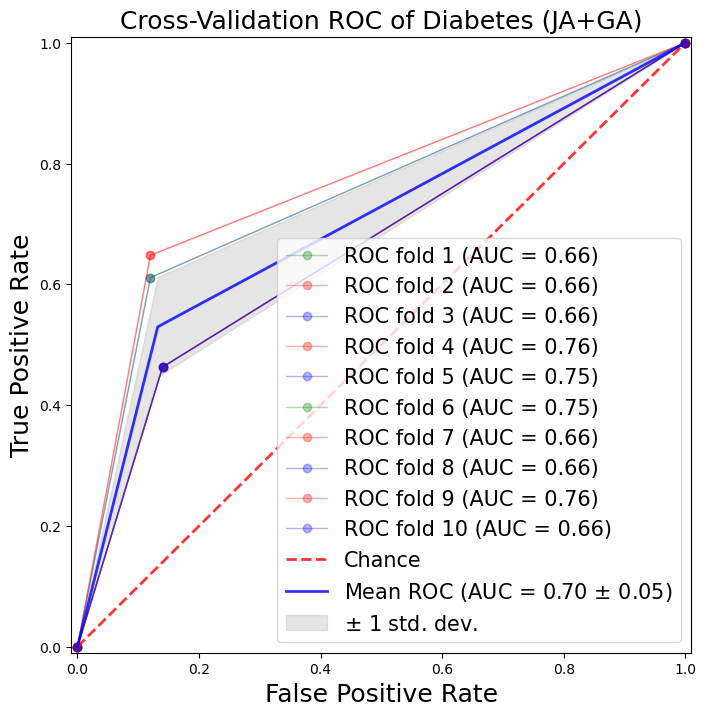

In [4]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_JA_GA_100iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")


av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_JA_GA_Diabetes_100iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_JA_GA_Diabetes_100iter.to_csv("./cv10_results_JA_GA_Diabetes_100iter.csv")
cv10_results_JA_GA_Diabetes_100iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (JA+GA)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## ISSA

Run:  1
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.6685185185185186
---------------------------------------------------------
Run:  2
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.6685185185185186
---------------------------------------------------------
Run:  3
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.6685185185185186
---------------------------------------------------------
Run:  4
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.6685185185185186
---------------------------------------------------------
Run:  5
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.

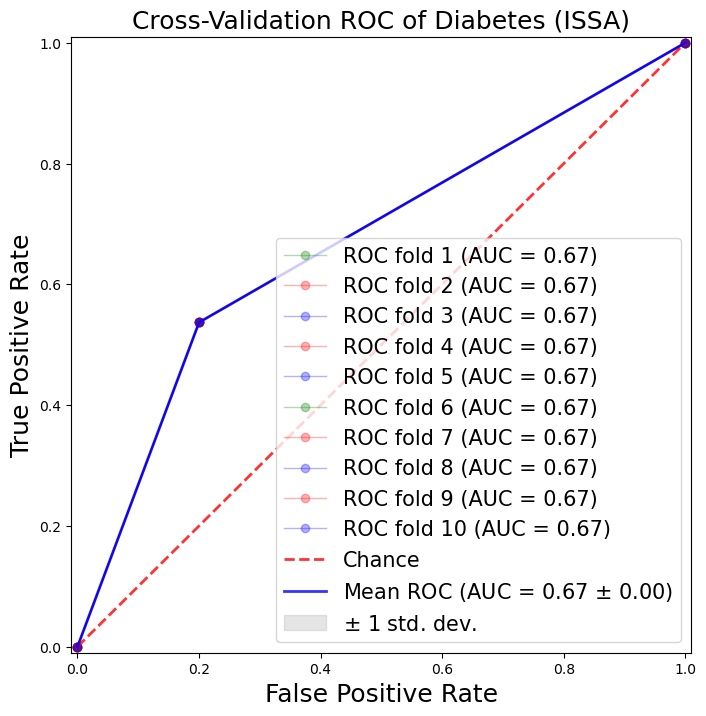

In [5]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_ISSA_100iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_ISSA_Diabetes_100iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_ISSA_Diabetes_100iter.to_csv("./cv10_results_ISSA_Diabetes_100iter.csv")
cv10_results_ISSA_Diabetes_100iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (ISSA)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## ISCA

Run:  1
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.6685185185185186
---------------------------------------------------------
Run:  2
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.6685185185185186
---------------------------------------------------------
Run:  3
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.6685185185185186
---------------------------------------------------------
Run:  4
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.6685185185185186
---------------------------------------------------------
Run:  5
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.

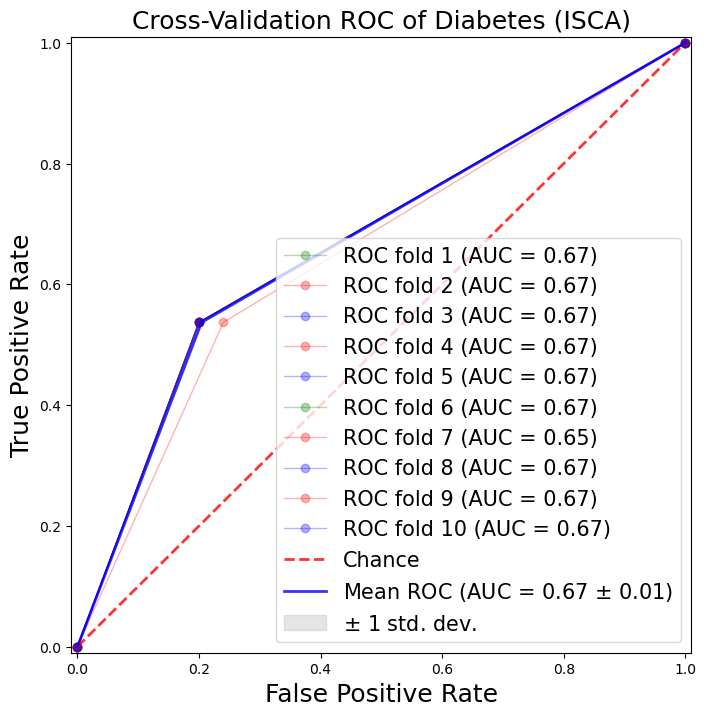

In [6]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_ISCA_100iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_ISCA_Diabetes_100iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_ISCA_Diabetes_100iter.to_csv("./cv10_results_ISCA_Diabetes_100iter.csv")
cv10_results_ISCA_Diabetes_100iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (ISCA)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## Genetic

Run:  1
 Accuracy:  0.7077922077922078  Precision:  0.6097560975609756  Recall:  0.46296296296296297  F1-Score:  0.5263157894736843  AUC:  0.6514814814814816
---------------------------------------------------------
Run:  2
 Accuracy:  0.7077922077922078  Precision:  0.6097560975609756  Recall:  0.46296296296296297  F1-Score:  0.5263157894736843  AUC:  0.6514814814814816
---------------------------------------------------------
Run:  3
 Accuracy:  0.7077922077922078  Precision:  0.6097560975609756  Recall:  0.46296296296296297  F1-Score:  0.5263157894736843  AUC:  0.6514814814814816
---------------------------------------------------------
Run:  4
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0.6892592592592592
---------------------------------------------------------
Run:  5
 Accuracy:  0.7077922077922078  Precision:  0.6097560975609756  Recall:  0.46296296296296297  F1-Score:  0.5263157894736843  AUC:

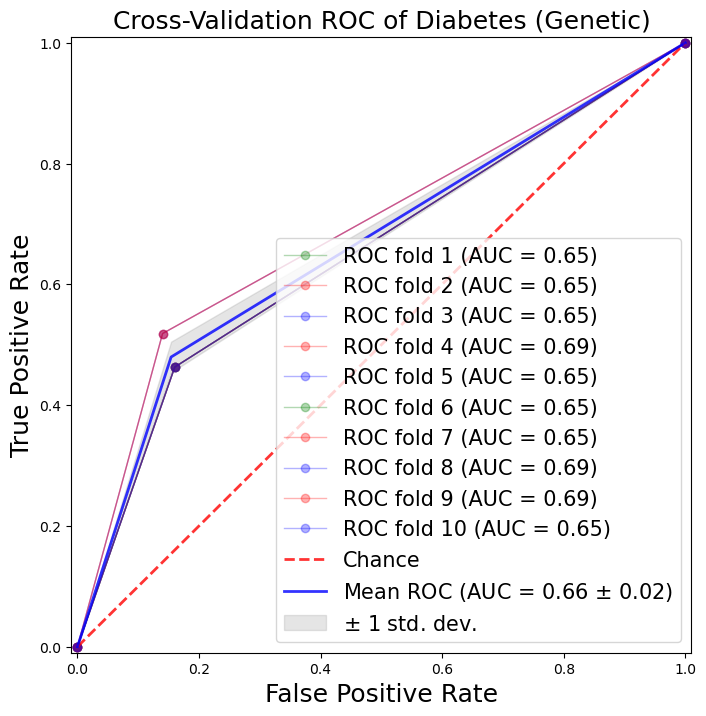

In [7]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_Genetic_100iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_Genetic_Diabetes_100iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_Genetic_Diabetes_100iter.to_csv("./cv10_results_Genetic_Diabetes_100iter.csv")
cv10_results_Genetic_Diabetes_100iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (Genetic)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## Jaya

Run:  1
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0.6892592592592592
---------------------------------------------------------
Run:  2
 Accuracy:  0.7077922077922078  Precision:  0.6097560975609756  Recall:  0.46296296296296297  F1-Score:  0.5263157894736843  AUC:  0.6514814814814816
---------------------------------------------------------
Run:  3
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0.6892592592592592
---------------------------------------------------------
Run:  4
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0.6892592592592592
---------------------------------------------------------
Run:  5
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0

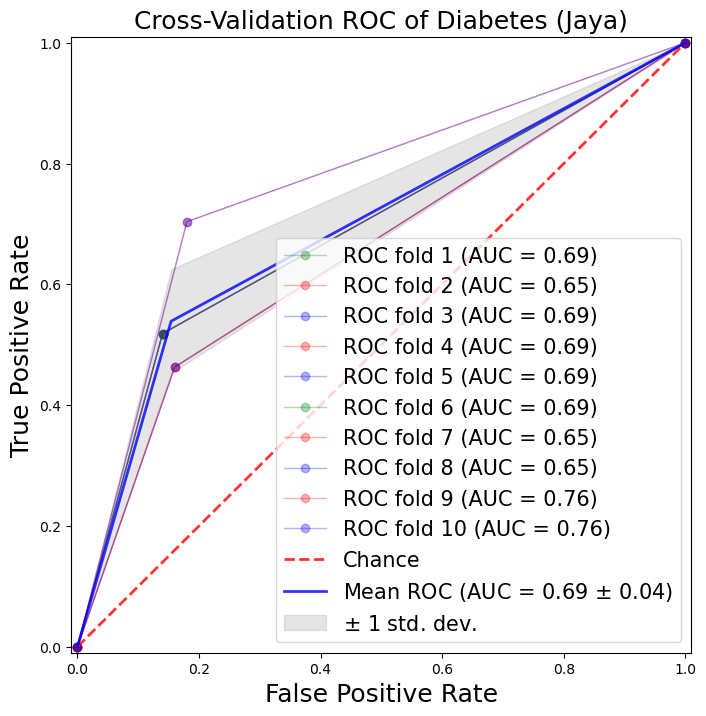

In [8]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_Jaya_100iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_Jaya_Diabetes_100iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_Jaya_Diabetes_100iter.to_csv("./cv10_results_Jaya_Diabetes_100iter.csv")
cv10_results_Jaya_Diabetes_100iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (Jaya)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## PSO

Run:  1
 Accuracy:  0.7857142857142857  Precision:  0.7333333333333333  Recall:  0.6111111111111112  F1-Score:  0.6666666666666666  AUC:  0.7455555555555555
---------------------------------------------------------
Run:  2
 Accuracy:  0.7857142857142857  Precision:  0.7333333333333333  Recall:  0.6111111111111112  F1-Score:  0.6666666666666666  AUC:  0.7455555555555555
---------------------------------------------------------
Run:  3
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  4
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  5
 Accuracy:  0.7857142857142857  Precision:  0.7333333333333333  Recall:  0.6111111111111112  F1-Score:  0.6666666666666666  AUC:  

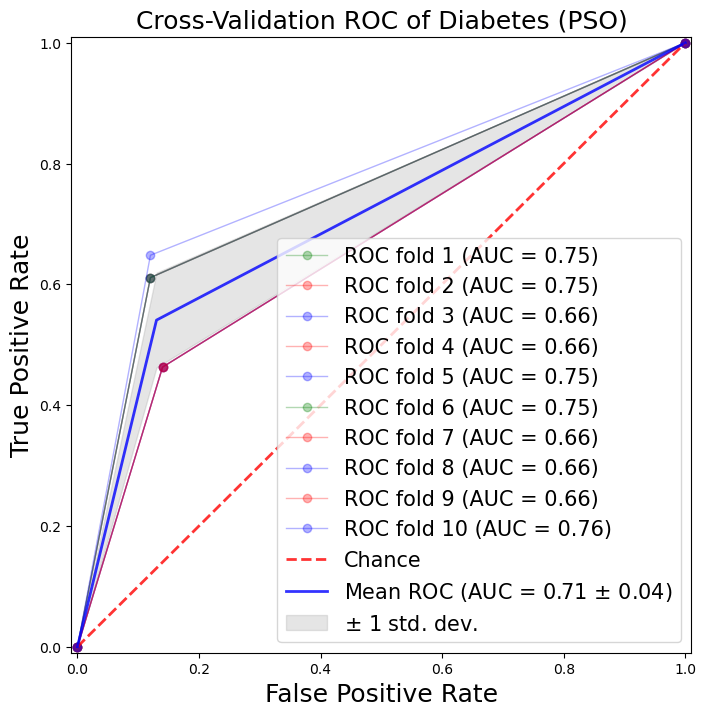

In [9]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_PSO_100iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_PSO_Diabetes_100iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_PSO_Diabetes_100iter.to_csv("./cv10_results_PSO_Diabetes_100iter.csv")
cv10_results_PSO_Diabetes_100iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (PSO)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## MGFPA

Run:  1
 Accuracy:  0.7207792207792207  Precision:  0.5901639344262295  Recall:  0.6666666666666666  F1-Score:  0.6260869565217391  AUC:  0.7083333333333334
---------------------------------------------------------
Run:  2
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.6685185185185186
---------------------------------------------------------
Run:  3
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.6685185185185186
---------------------------------------------------------
Run:  4
 Accuracy:  0.6818181818181818  Precision:  0.5471698113207547  Recall:  0.5370370370370371  F1-Score:  0.5420560747663552  AUC:  0.6485185185185186
---------------------------------------------------------
Run:  5
 Accuracy:  0.7077922077922078  Precision:  0.5918367346938775  Recall:  0.5370370370370371  F1-Score:  0.5631067961165048  AUC:  0.

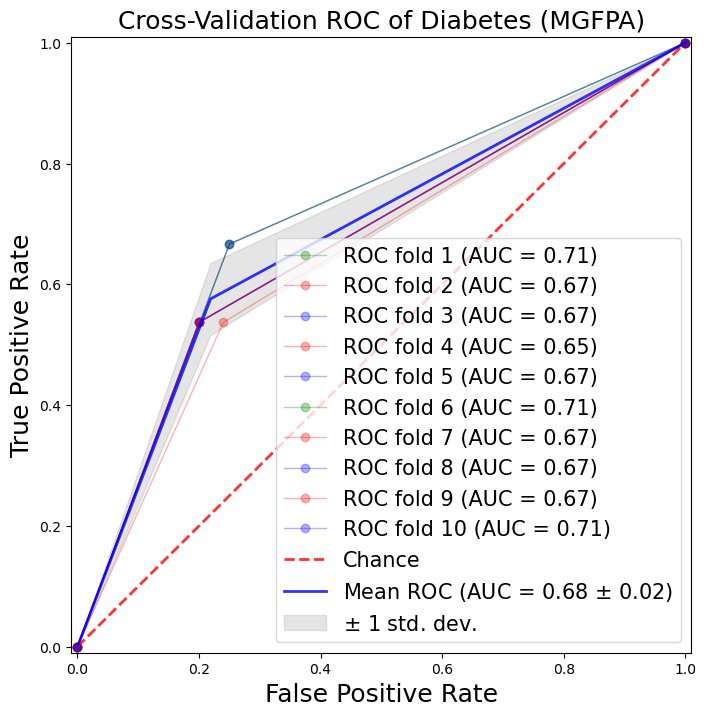

In [10]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_MGFPA_100iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_MGFPA_Diabetes_100iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_MGFPA_Diabetes_100iter.to_csv("./cv10_results_MGFPA_Diabetes_100iter.csv")
cv10_results_MGFPA_Diabetes_100iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (MGFPA)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

# 380 Iteration

## Jaya + Genetic

Run:  1
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  2
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  3
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  4
 Accuracy:  0.7987012987012987  Precision:  0.7446808510638298  Recall:  0.6481481481481481  F1-Score:  0.6930693069306931  AUC:  0.764074074074074
---------------------------------------------------------
Run:  5
 Accuracy:  0.7857142857142857  Precision:  0.7333333333333333  Recall:  0.6111111111111112  F1-Score:  0.6666666666666666  AUC:  

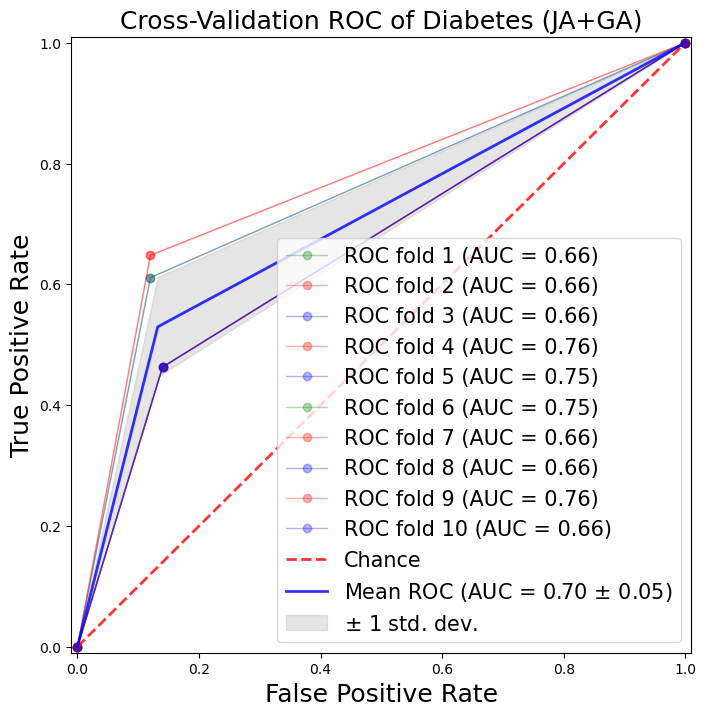

In [11]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_JA_GA_380iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")


av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_JA_GA_Diabetes_380iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_JA_GA_Diabetes_380iter.to_csv("./cv10_results_JA_GA_Diabetes_380iter.csv")
cv10_results_JA_GA_Diabetes_380iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (JA+GA)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## ISSA

Run:  1
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  2
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  3
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  4
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  5
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC

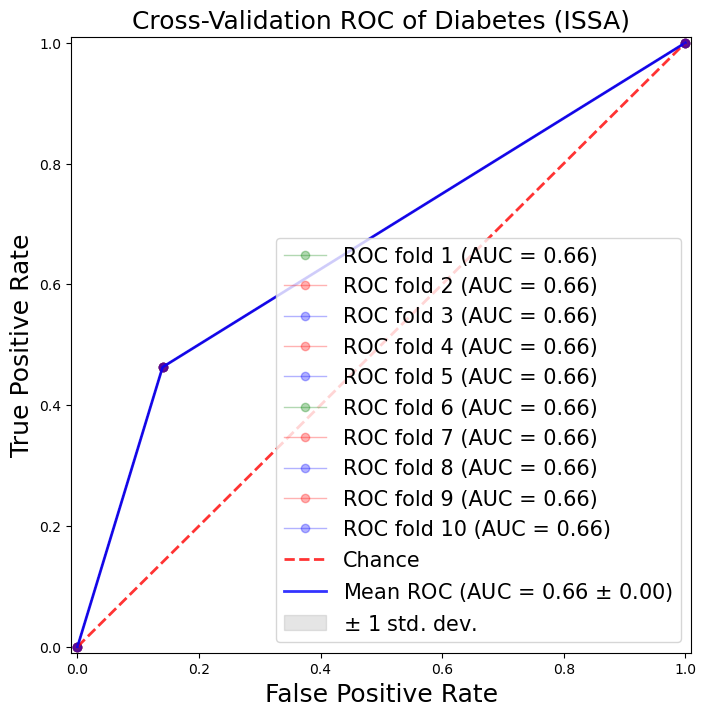

In [12]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_ISSA_380iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_ISSA_Diabetes_380iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_ISSA_Diabetes_380iter.to_csv("./cv10_results_ISSA_Diabetes_380iter.csv")
cv10_results_ISSA_Diabetes_380iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (ISSA)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## ISCA

Run:  1
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  2
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  3
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  4
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  5
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC

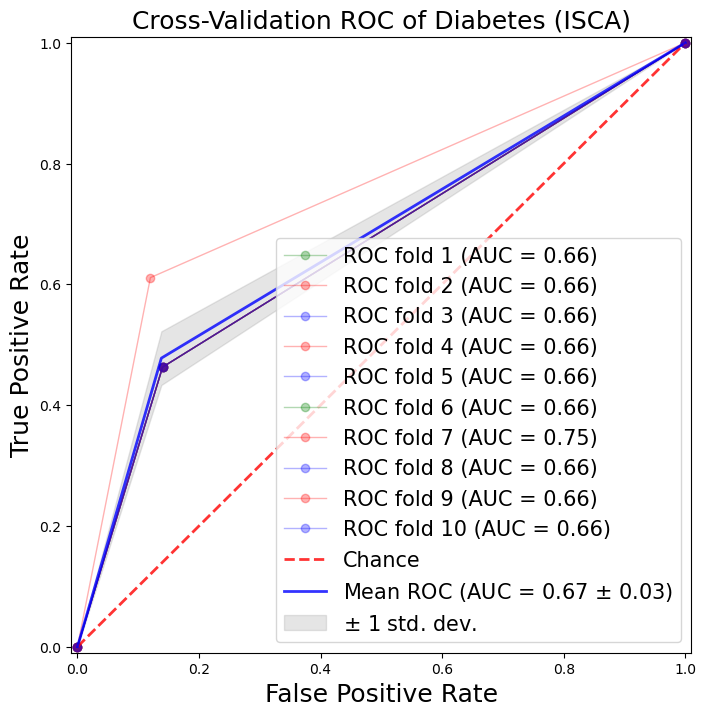

In [13]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_ISCA_380iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_ISCA_Diabetes_380iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_ISCA_Diabetes_380iter.to_csv("./cv10_results_ISCA_Diabetes_380iter.csv")
cv10_results_ISCA_Diabetes_380iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (ISCA)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## Genetic

Run:  1
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  2
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  3
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:  0.6614814814814816
---------------------------------------------------------
Run:  4
 Accuracy:  0.7857142857142857  Precision:  0.7333333333333333  Recall:  0.6111111111111112  F1-Score:  0.6666666666666666  AUC:  0.7455555555555555
---------------------------------------------------------
Run:  5
 Accuracy:  0.7207792207792207  Precision:  0.6410256410256411  Recall:  0.46296296296296297  F1-Score:  0.5376344086021506  AUC:

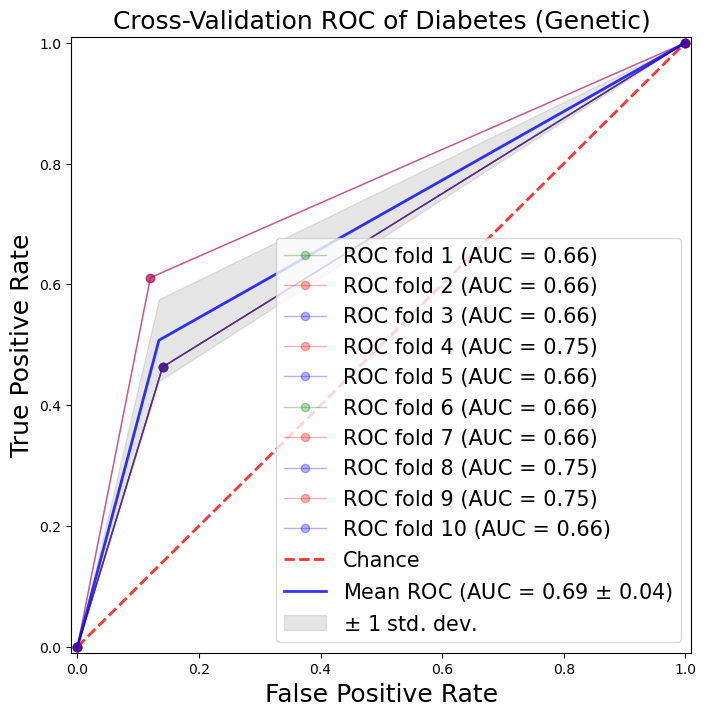

In [14]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_Genetic_380iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_Genetic_Diabetes_380iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_Genetic_Diabetes_380iter.to_csv("./cv10_results_Genetic_Diabetes_380iter.csv")
cv10_results_Genetic_Diabetes_380iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (Genetic)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## Jaya

Run:  1
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0.6892592592592592
---------------------------------------------------------
Run:  2
 Accuracy:  0.7077922077922078  Precision:  0.6097560975609756  Recall:  0.46296296296296297  F1-Score:  0.5263157894736843  AUC:  0.6514814814814816
---------------------------------------------------------
Run:  3
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0.6892592592592592
---------------------------------------------------------
Run:  4
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0.6892592592592592
---------------------------------------------------------
Run:  5
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0

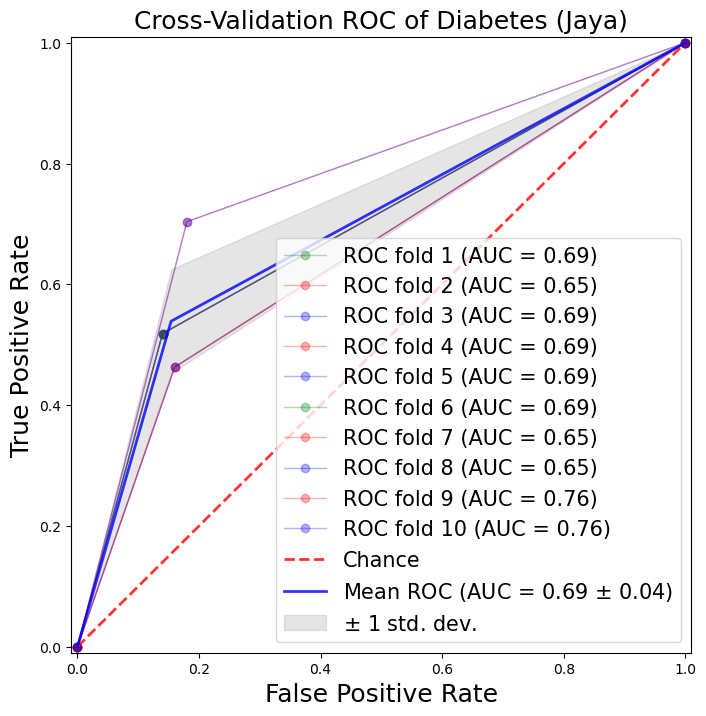

In [15]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_Jaya_380iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_Jaya_Diabetes_380iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_Jaya_Diabetes_380iter.to_csv("./cv10_results_Jaya_Diabetes_380iter.csv")
cv10_results_Jaya_Diabetes_380iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (Jaya)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## PSO

Run:  1
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0.6892592592592592
---------------------------------------------------------
Run:  2
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  0.6892592592592592
---------------------------------------------------------
Run:  3
 Accuracy:  0.7077922077922078  Precision:  0.6097560975609756  Recall:  0.46296296296296297  F1-Score:  0.5263157894736843  AUC:  0.6514814814814816
---------------------------------------------------------
Run:  4
 Accuracy:  0.7077922077922078  Precision:  0.6097560975609756  Recall:  0.46296296296296297  F1-Score:  0.5263157894736843  AUC:  0.6514814814814816
---------------------------------------------------------
Run:  5
 Accuracy:  0.7402597402597403  Precision:  0.6666666666666666  Recall:  0.5185185185185185  F1-Score:  0.5833333333333334  AUC:  

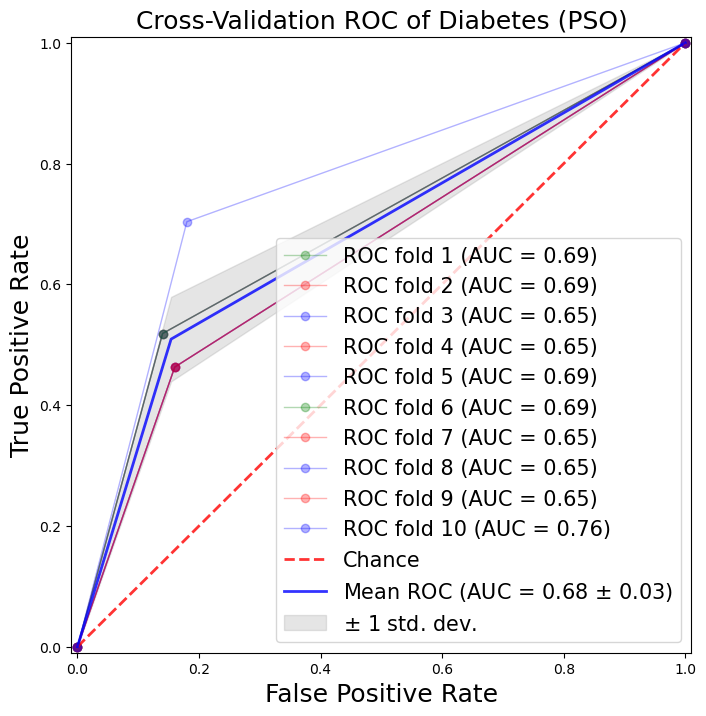

In [16]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_PSO_380iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_PSO_Diabetes_380iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_PSO_Diabetes_380iter.to_csv("./cv10_results_PSO_Diabetes_380iter.csv")
cv10_results_PSO_Diabetes_380iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (PSO)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

## MGFPA

Run:  1
 Accuracy:  0.7727272727272727  Precision:  0.6666666666666666  Recall:  0.7037037037037037  F1-Score:  0.6846846846846847  AUC:  0.7568518518518519
---------------------------------------------------------
Run:  2
 Accuracy:  0.7272727272727273  Precision:  0.6428571428571429  Recall:  0.5  F1-Score:  0.5625000000000001  AUC:  0.6749999999999999
---------------------------------------------------------
Run:  3
 Accuracy:  0.7272727272727273  Precision:  0.6428571428571429  Recall:  0.5  F1-Score:  0.5625000000000001  AUC:  0.6749999999999999
---------------------------------------------------------
Run:  4
 Accuracy:  0.7272727272727273  Precision:  0.6363636363636364  Recall:  0.5185185185185185  F1-Score:  0.5714285714285714  AUC:  0.6792592592592592
---------------------------------------------------------
Run:  5
 Accuracy:  0.7272727272727273  Precision:  0.6428571428571429  Recall:  0.5  F1-Score:  0.5625000000000001  AUC:  0.6749999999999999
----------------------------

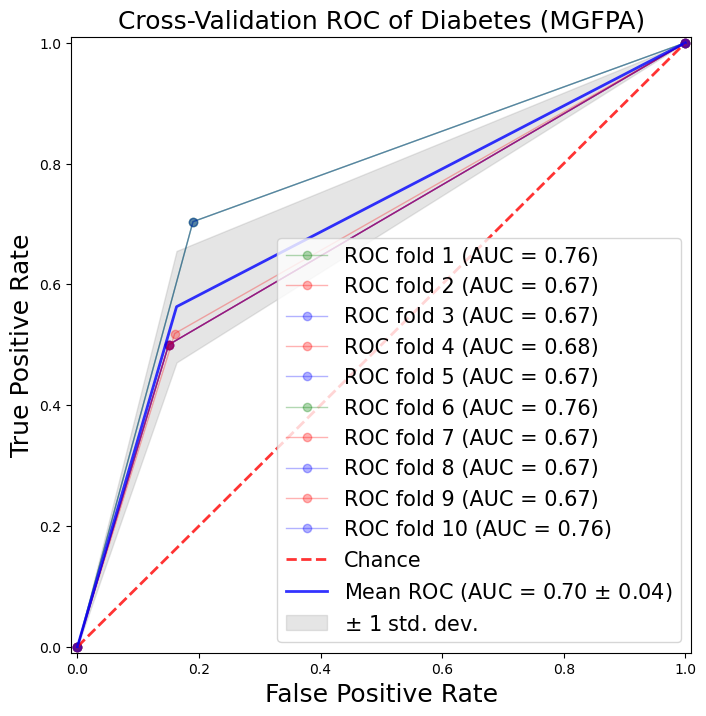

In [17]:
tprs = []
aucs = []
fprs = []
# Define per-fold score containers <-- these are new
accuracy_per_run = []
precision_per_run = []
recall_per_run = []
f1score_per_run = []
N_run = 0
for i in range(1, 11):
    var_indexes = f"featuresIndex_Diabetes_MGFPA_380iter_run{i}"
    var_value_indexes = locals()[var_indexes]
    xtrain = features_train_Diabetes[:, var_value_indexes]
    xtest = features_test_Diabetes[:, var_value_indexes]
    clf = None
    clf = SVC(kernel='rbf', random_state=0)
    clf.fit(xtrain, y_train)
    preds = clf.predict(xtest)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    auc_fold = auc(fpr, tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    aucs.append(auc_fold)
    accuracy_per_run.append(accuracy)
    precision_per_run.append(precision)
    recall_per_run.append(recall)
    f1score_per_run.append(f1)
    N_run += 1
    print("Run: ", N_run)
    print(" Accuracy: ", accuracy, " Precision: ", precision, " Recall: ", recall, " F1-Score: ", f1, " AUC: ", auc_fold)
    confusionM = confusion_matrix(preds, y_test)
    print("---------------------------------------------------------")

av_acc = sum(accuracy_per_run)/ len(accuracy_per_run)
av_pre = sum(precision_per_run)/ len(accuracy_per_run)
av_rec = sum(recall_per_run)/ len(accuracy_per_run)
av_f1 = sum(f1score_per_run)/ len(accuracy_per_run)
av_auc = sum(aucs) / len(accuracy_per_run)
print("Average: ")
print(" Accuracy: ", av_acc, " Precision: ", av_pre, " Recall: ", av_rec, " F1-Score: ", av_f1, " AUC: ", av_auc)
cv10_results_MGFPA_Diabetes_380iter = pd.DataFrame(data={"Accuracy": accuracy_per_run, "Precision": precision_per_run, "Recall": recall_per_run, "F1-Score": f1score_per_run, " AUC": aucs})
cv10_results_MGFPA_Diabetes_380iter.to_csv("./cv10_results_MGFPA_Diabetes_380iter.csv")
cv10_results_MGFPA_Diabetes_380iter.head()

plt.figure(figsize=(8,8))
plt.plot(fprs[0], tprs[0], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (1, aucs[0]))
plt.plot(fprs[1], tprs[1], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (2, aucs[1]))
plt.plot(fprs[2], tprs[2], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (3, aucs[2]))
plt.plot(fprs[3], tprs[3], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (4, aucs[3]))
plt.plot(fprs[4], tprs[4], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (5, aucs[4]))
plt.plot(fprs[5], tprs[5], 'g-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (6, aucs[5]))
plt.plot(fprs[6], tprs[6], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (7, aucs[6]))
plt.plot(fprs[7], tprs[7], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (8, aucs[7]))
plt.plot(fprs[8], tprs[8], 'r-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (9, aucs[8]))
plt.plot(fprs[9], tprs[9], 'b-o', lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (10, aucs[9]))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_fpr = np.mean(fprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Diabetes (MGFPA)',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()